   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

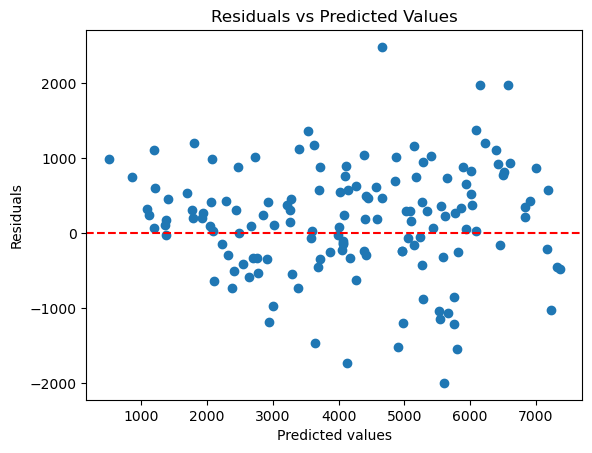

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("E:/bike_sharing_data.csv")

# Display the first few rows of the dataset
print(data.head())

# Check the structure and info of the dataset
print(data.info())

# Identify columns with string or date-like data
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            # Attempt to convert to datetime format if the column has date-like strings
            data[col] = pd.to_datetime(data[col], errors='coerce')
        except Exception as e:
            print(f"Column {col} could not be converted: {e}")

# Extract features from datetime columns if applicable
for col in data.columns:
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        data[f'{col}_year'] = data[col].dt.year
        data[f'{col}_month'] = data[col].dt.month
        data[f'{col}_day'] = data[col].dt.day
        data.drop(col, axis=1, inplace=True)  # Drop the original datetime column

# Check for missing values and fill if needed
print(data.isnull().sum())
data.ffill(inplace=True)

# Define independent and target variables
X = data.drop(['cnt', 'casual', 'registered'], axis=1, errors='ignore')  # Independent variables
y = data['cnt'] if 'cnt' in data.columns else None  # Ensure 'cnt' is available

if y is None:
    raise ValueError("Target variable 'cnt' is missing from the dataset.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical features explicitly
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Print to confirm numerical features
print("Numerical features:", numerical_features)

# Initialize the scaler
scaler = StandardScaler()

# Ensure numerical features are float64 before scaling
X_train[numerical_features] = X_train[numerical_features].astype(np.float64)
X_test[numerical_features] = X_test[numerical_features].astype(np.float64)

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Analyze residuals
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

